<a href="https://colab.research.google.com/github/uttarakhatri/Sleep-stage-EEG-transitions/blob/main/ISRUC_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#embedding dimension

from nolitsa import data, dimension

# Generate data.
x = sub1_data[3][:50000]
mean= mean(sub1_data[3])
dim = np.arange(1, 11)
f1, f2, f3 = dimension.fnn(x, tau=tau[100], dim=dim, window=10, metric='euclidean', maxnum=100)

plt.title(r'FNN for EEG')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--')
print(f1*100)
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

plt.show()

In [ ]:
!pip install pyunicorn
!pip install git+https://github.com/manu-mannattil/nolitsa.git

  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-413ktn47
  Running command git clone -q https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-413ktn47
  Created wheel for nolitsa: filename=nolitsa-0.1-cp36-none-any.whl size=31134 sha256=d8468cb734c3825d0e24e5612518e4a9a22d2820be54c5c661fbf577f1722645
  Stored in directory: /tmp/pip-ephem-wheel-cache-zkqp1m4q/wheels/9b/2e/49/14f1c7a1b4acd6716bb946b6b40d722c4be76fd0e5b1ade611
Successfully built nolitsa


In [ ]:
cd /usr/local/lib/python3.6/dist-packages/pyunicorn

/usr/local/lib/python3.6/dist-packages/pyunicorn


In [ ]:
!rm __init__.py

rm: cannot remove '__init__.py': No such file or directory


In [ ]:
import toolz
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
sub2_data= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/2/sub2_ica.npy')
mea= [st.mean(sublist) for sublist in toolz.partition_all(6, sub2_data[3])]
print(len(mea))

941000


In [ ]:
sub1_data[0]= 0.2*sub1_data[0]
len=5000
plt.scatter(sub1_data[0][:len:10], mea, s= 0.3, color= 'red')
plt.plot(sub1_data[0][:len], sub1_data[3][:len], alpha=0.6)
plt.title('Binned every 10 points')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

NameError: ignored

Plotting Power spectrum to see effect of ICA

In [ ]:
import numpy as np
epochs= np.load('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/2/stages.npy', allow_pickle= True)
# lis= [0]
# stages=['0']
# for i in range(1,len(epochs)):

#   #if epochs[i]== epochs[i-1]:

#   if epochs[i]!= epochs[i-1]:
#     lis.append(i)
#     stages.append(epochs[i])

In [ ]:
import numpy as np
# plotting facilities
import pylab
import matplotlib.pyplot as plt
from pyunicorn.timeseries import RecurrencePlot, RecurrenceNetwork

In [ ]:
import statsmodels.api as sm
#normalisation
mea= (mea - min(mea))/(max(mea)- min(mea))
#autocorrelation
tau=[]
for j in range(1,942):
  #fig =sm.graphics.tsa.plot_acf(sub1_data[3][i*6000: (i+1)*6000],lags=50,fft=True)
  rel = sm.tsa.acf(mea[(j-1)*1000:(j)*1000], nlags=75, fft=True)
  #plt.show()
  y= np.arange(0,75,1.0)
  for k in range(len(y)):
    if (rel[k]-(1.0/np.e))<0.000001:
      tau.append(k)
      break
print(tau)
print(len(tau))

[5, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 6, 3, 3, 3, 2, 5, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 5, 4, 4, 5, 6, 3, 5, 5, 5, 5, 3, 3, 6, 3, 4, 3, 6, 3, 4, 5, 3, 5, 3, 3, 3, 6, 3, 4, 6, 6, 2, 4, 3, 5, 3, 5, 7, 6, 3, 4, 5, 4, 5, 3, 4, 6, 5, 4, 6, 5, 4, 4, 5, 2, 3, 4, 5, 3, 5, 5, 4, 3, 5, 4, 5, 4, 5, 3, 5, 2, 8, 5, 7, 6, 3, 4, 1, 5, 3, 2, 4, 5, 3, 4, 5, 3, 5, 4, 3, 4, 4, 4, 4, 4, 6, 4, 7, 7, 3, 3, 4, 4, 5, 4, 6, 4, 5, 6, 3, 6, 4, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 3, 6, 6, 4, 6, 6, 5, 4, 6, 6, 5, 4, 4, 5, 5, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 6, 3, 7, 9, 5, 5, 5, 5, 5, 5, 2, 9, 9, 8, 7, 9, 6, 8, 5, 6, 5, 6, 5, 6, 5, 5, 4, 5, 6, 6, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 6, 5, 5, 3, 3, 3, 3, 6, 4, 4, 8, 5, 3, 4, 3, 7, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 6, 3, 3, 4, 3, 6, 6, 5, 3, 3, 3, 5, 4, 5, 6, 3, 3, 4, 3, 4, 4, 5, 6, 6, 3, 4, 6, 

In [ ]:
#  Generate a recurrence network at fixed threshold
from pyunicorn.timeseries import RecurrencePlot, RecurrenceNetwork
x = raw_ica[3]

measures= np.zeros((5, 941))
DIM=7
for r in range(1,942):
  rp = RecurrencePlot(x[(r-1)*1000: (r)*1000], dim=DIM, tau=tau[r-1], metric= "euclidean", normalize=False, threshold= 0.2)
#  Calculate some standard RQA measures
#DET = rp.determinism
#LAM = rp.laminarity
  rn = RecurrenceNetwork(x[(r-1)*1000: (r)*1000], dim=DIM, tau=tau[r-1], metric= "euclidean", normalize=False, threshold=0.2)#  Generate a recurrence network at fixed recurrence rate
  measures[0][r-1]=rp.recurrence_rate()
  print(type(rn))

#  Calculate average path length, transitivity and assortativity
  measures[1][r-1]= rn.average_path_length()
  measures[2][r-1] = rn.transitivity()
  measures[3][r-1]= rn.global_clustering()
  #measures[4][r] = rn.assortativity()
  print(r)


In [ ]:
print(len(measures[0]))

941


In [ ]:
print(len(epochs))

942


In [ ]:
ti= range(0,941)
plt.scatter(epochs[1:], measures[0][], s=0.4)
plt.ylim()
plt.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


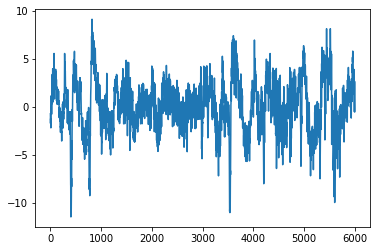

In [ ]:
x = sub2_data[3]
rp = RecurrencePlot(x[1572000:1578000], dim=7, tau=tau[263], metric= "euclidean", normalize=False, threshold= 0.35)
rn = RecurrenceNetwork(x[1572000:1578000], dim=7, tau=tau[263], metric= "euclidean", normalize=False, threshold= 0.35)

plt.plot(range(0,6000), x[1572000:1578000])
plt.show()


In [ ]:
print(tau[262])
print('rr', rp.recurrence_rate())
print('cc', rn.global_clustering())
print('cpl', rn.average_path_length())

6
rr 0.00016756030291042033
Calculating global clustering coefficient (C_2)...
Calculating local clustering coefficients...
cc 0.0
Calculating average (weighted) shortest path length...
cpl 1.0
